In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
data = pd.read_csv('boston_housing_prices.csv')

In [26]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
class NeuralNetworkModel:
    def __init__(self, n_x, n_h, n_y, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.parameters = self.initialize_parameters(n_x, n_h, n_y)
        
    def initialize_parameters(self, n_x, n_h, n_y):
        np.random.seed(42)
        W1 = np.random.randn(n_h, n_x) * 0.01
        b1 = np.zeros((n_h, 1))
        W2 = np.random.randn(n_y, n_h) * 0.01
        b2 = np.zeros((n_y, 1))

        parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
        return parameters

    def forward_propagation(self, X):
        W1 = self.parameters['W1']
        b1 = self.parameters['b1']
        W2 = self.parameters['W2']
        b2 = self.parameters['b2']

        Z1 = np.dot(W1, X) + b1
        A1 = np.maximum(0, Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = Z2

        cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
        return A2, cache

    def compute_cost(self, A2, Y):
        m = Y.shape[1]
        cost = (1 / (2 * m)) * np.sum(np.square(A2 - Y))
        return cost

    def backward_propagation(self, cache, X, Y):
        m = X.shape[1]
        W1 = self.parameters['W1']
        W2 = self.parameters['W2']
        A1 = cache['A1']
        A2 = cache['A2']

        dZ2 = A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = np.multiply(dA1, np.int64(A1 > 0))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        return grads

    def update_parameters(self, grads):
        W1 = self.parameters['W1']
        b1 = self.parameters['b1']
        W2 = self.parameters['W2']
        b2 = self.parameters['b2']

        dW1 = grads['dW1']
        db1 = grads['db1']
        dW2 = grads['dW2']
        db2 = grads['db2']

        W1 = W1 - self.learning_rate * dW1
        b1 = b1 - self.learning_rate * db1
        W2 = W2 - self.learning_rate * dW2
        b2 = b2 - self.learning_rate * db2

        self.parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    def model(self, X_train, Y_train, n_h, num_iterations=1000):
        n_x = X_train.shape[0]
        n_y = Y_train.shape[0]
        self.parameters = self.initialize_parameters(n_x, n_h, n_y)

        for i in range(num_iterations):
            A2, cache = self.forward_propagation(X_train)
            cost = self.compute_cost(A2, Y_train)
            grads = self.backward_propagation(cache, X_train, Y_train)
            self.update_parameters(grads)

            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        A2, _ = self.forward_propagation(X)
        return A2


In [28]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.to_numpy().reshape(1, -1)
y_test = y_test.to_numpy().reshape(1, -1)

nn_model = NeuralNetworkModel(n_x=X_train.shape[0], n_h=64, n_y=1, learning_rate=0.01)

nn_model.model(X_train, y_train, n_h=64, num_iterations=1000)

predictions = nn_model.predict(X_test)

Cost after iteration 0: 303.2339399011368
Cost after iteration 100: 8.66279502837088
Cost after iteration 200: 6.414773638332483
Cost after iteration 300: 5.589403959742589
Cost after iteration 400: 5.078730853108668
Cost after iteration 500: 4.738810634636933
Cost after iteration 600: 4.529360494586184
Cost after iteration 700: 4.342452835482665
Cost after iteration 800: 4.1933383354329115
Cost after iteration 900: 4.051892456445029


In [29]:
y_pred = predictions.flatten()
y_true = y_test.flatten()

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.2656171074004785
Mean Squared Error (MSE): 10.600274621528012
Root Mean Squared Error (RMSE): 3.2558062936126917
R-squared (R²): 0.8554516872755139


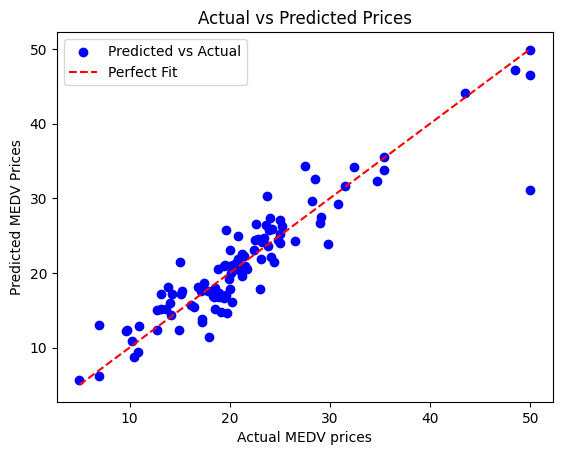

In [30]:
plt.scatter(y_test.flatten(), predictions.flatten(), color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual MEDV prices')
plt.ylabel('Predicted MEDV Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()